In [2]:
import kagglehub
yusufkorayhasdemir_fer2013csv_path = kagglehub.dataset_download('yusufkorayhasdemir/fer2013csv')
umangchaudhary7198_music_dataset_path = kagglehub.dataset_download('umangchaudhary7198/music-dataset')

print('Data source import complete.')


100%|██████████| 96.6M/96.6M [00:00<00:00, 210MB/s]

Extracting files...


100%|██████████| 5.32k/5.32k [00:00<00:00, 8.70MB/s]

Extracting files...
Data source import complete.


In [3]:
!pip install librosa python-docx --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 14.3 MB/s eta 0:00:00


In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

In [5]:
fer_path = '/kaggle/input/fer2013/fer2013.csv'


print('FER2013 path set to:', fer_path)

music_path = '/kaggle/input/music-dataset/music.csv'


print('Music dataset path set to:', music_path)

FER2013 path set to: /kaggle/input/fer2013/fer2013.csv
Music dataset path set to: /kaggle/input/music-dataset/music.csv


In [6]:

fer_path = yusufkorayhasdemir_fer2013csv_path + '/fer2013.csv'

print('FER2013 path set to:', fer_path)

music_path = umangchaudhary7198_music_dataset_path + '/music.csv'

print('Music dataset path set to:', music_path)

FER2013 path set to: /root/.cache/kagglehub/datasets/yusufkorayhasdemir/fer2013csv/versions/1/fer2013.csv
Music dataset path set to: /root/.cache/kagglehub/datasets/umangchaudhary7198/music-dataset/versions/1/music.csv


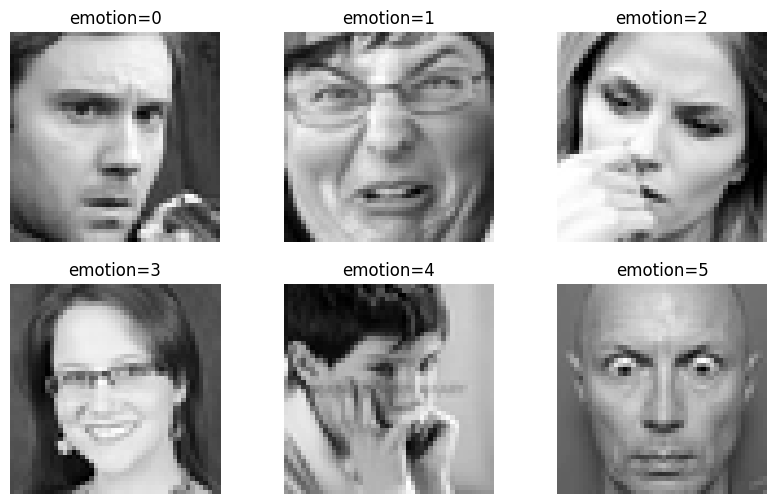

In [7]:
def pixels_to_img(pixels_str):
    arr = np.fromstring(pixels_str, dtype=int, sep=' ')
    return arr.reshape(48,48).astype('uint8')

df = pd.read_csv(fer_path)

classes = sorted(df['emotion'].unique())
plt.figure(figsize=(10,6))
i=1
for c in classes[:6]:
    sample = df[df['emotion']==c].iloc[0]['pixels']
    img = pixels_to_img(sample)
    plt.subplot(2,3,i)
    plt.imshow(img, cmap='gray')
    plt.title(f'emotion={c}')
    plt.axis('off')
    i+=1
plt.show()

In [8]:
df = pd.read_csv(fer_path)
display(df.head())

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [9]:
os.makedirs('/kaggle/working/', exist_ok=True)

imgs = np.stack(df['pixels'].apply(lambda s: pixels_to_img(s)).values)
imgs = imgs[..., np.newaxis] / 255.0
labels = df['emotion'].values
np.save('/kaggle/working/images.npy', imgs)
np.save('/kaggle/working/labels.npy', labels)
print("Saved images.npy and labels.npy", imgs.shape, labels.shape)

Saved images.npy and labels.npy (35887, 48, 48, 1) (35887,)


In [10]:
music = pd.read_csv(music_path)
print(music.head())

if 'tags' not in music.columns:

    sample_tags = [
        'electronic,house,techno', 'electronic,techno,minimal', 'ambient,experimental',
        'electronic,house', 'ambient,electronic', 'pop,rock,alternative', 'hiphop,rap',
        'jazz,blues', 'classical', 'country', 'electronic,trance', 'metal,heavy metal',
        'reggae', 'indie,alternative', 'electronic,dubstep', 'pop,dance', 'ambient,downtempo',
        'hiphop,rnb', 'jazz,funk', 'classical,orchestral', 'country,folk', 'electronic,drum and bass',
        'metal,death metal', 'reggae,dub', 'indie,pop', 'electronic,trap', 'pop,synthpop',
        'ambient,drone', 'hiphop,oldschool', 'jazz,soul', 'classical,chamber music',
        'country,bluegrass', 'electronic,hardcore', 'metal,black metal', 'reggae,ska',
        'indie,rock', 'electronic,breakbeat', 'pop,disco', 'ambient,soundscape',
        'hiphop,instrumental', 'jazz,fusion', 'classical,opera', 'country,americana',
        'electronic,garage', 'metal,thrash metal', 'reggae,dancehall', 'indie,folk',
        'electronic,jungle', 'pop,new wave', 'ambient,dark ambient', 'hiphop,conscious',
        'jazz,latin jazz', 'classical,choral', 'country,outlaw', 'electronic,idm',
        'metal,doom metal', 'reggae,rocksteady', 'indie,electronic', 'electronic,techno,acid',
        'pop,electropop', 'ambient,ispherical', 'hiphop,underground', 'jazz,bebop',
        'classical,romantic', 'country,traditional', 'electronic,minimal techno', 'metal,progressive metal',
        'reggae,lovers rock', 'indie,synthpop', 'electronic,house,deep house', 'pop,funk',
        'ambient,noise', 'hiphop,gangsta', 'jazz,cool jazz', 'classical,baroque',
        'country,alt-country', 'electronic,trance,progressive', 'metal,power metal',
        'reggae,dubstep', 'indie,folk rock', 'electronic,house,tech house', 'pop,soul',
        'ambient,experimental ambient', 'hiphop,boom bap', 'jazz,swing', 'classical,modern classical',
        'country,red dirt', 'electronic,hardstyle', 'metal,groove metal', 'reggae,roots reggae',
        'indie,dream pop', 'electronic,techno,dub techno', 'pop,rnb', 'ambient,meditative',
        'hiphop,trap metal', 'jazz,free jazz', 'classical,impressionist', 'country,urban cowboy',
        'electronic,house,french house', 'metal,nu metal', 'reggae,jungle', 'indie,shoegaze',
        'electronic,trance,uplifting', 'pop,k-pop', 'ambient,cinematic', 'hiphop,grime',
        'jazz,smooth jazz', 'classical,renaissance', 'country,bro-country', 'electronic,dub techno',
        'metal,metalcore', 'reggae,ska punk', 'indie,post-punk', 'electronic,house,gospel house',
        'pop,j-pop', 'ambient,industrial ambient', 'hiphop,political hip hop', 'jazz,acid jazz',
        'classical,medieval', 'country,traditional country', 'electronic,minimal house', 'metal,sludge metal',
        'reggae,dancehall reggae', 'indie,garage rock', 'electronic,techno,hard techno', 'pop,c-pop',
        'ambient,dark ambient', 'hiphop,alternative hip hop', 'jazz,bebop,hard bop', 'classical,classical period',
        'country,neotraditional country', 'electronic,deep house', 'metal,deathcore', 'reggae,lovers rock reggae',
        'indie,indie pop', 'electronic,trance,tech trance', 'pop,mandopop', 'ambient,ambient house',
        'hiphop,conscious hip hop', 'jazz,cool jazz,west coast jazz', 'classical,romantic period',
        'country,alt-country,americana', 'electronic,progressive trance', 'metal,power metal,heavy/power metal',
        'reggae,dubstep,brostep', 'indie,folk rock,singer-songwriter', 'electronic,tech house',
        'pop,soul,r&b', 'ambient,experimental ambient,drone', 'hiphop,boom bap,golden age hip hop',
        'jazz,swing,big band', 'classical,modern classical,contemporary classical', 'country,red dirt country',
        'electronic,hardstyle,rawstyle', 'metal,groove metal,post-metal', 'reggae,roots reggae,steppers',
        'indie,dream pop,shoegaze', 'electronic,dub techno,minimal dub', 'pop,rnb,contemporary r&b',
        'ambient,meditative,new age', 'hiphop,trap metal,soundcloud rap', 'jazz,free jazz,avant-garde jazz',
        'classical,impressionist,20th century classical', 'country,urban cowboy,pop country',
        'electronic,house,french house,filter house', 'metal,nu metal,rap metal', 'reggae,jungle,drum and bass',
        'indie,shoegaze,dream pop', 'electronic,trance,uplifting trance', 'pop,k-pop,j-pop',
        'ambient,cinematic,soundtrack', 'hiphop,grime,uk hip hop', 'jazz,smooth jazz,instrumental jazz',
        'classical,renaissance,early music', 'country,bro-country,pop country', 'electronic,dub techno,minimal dub techno',
        'metal,metalcore,deathcore', 'reggae,ska punk,punk rock', 'indie,post-punk,new wave',
        'electronic,house,gospel house, soulful house', 'pop,j-pop,k-pop', 'ambient,industrial ambient,dark ambient',
        'hiphop,political hip hop,conscious hip hop', 'jazz,acid jazz,funk jazz', 'classical,medieval,early music',
        'country,traditional country,classic country', 'electronic,minimal house,deep house',
        'metal,sludge metal,doom metal', 'reggae,dancehall reggae,bashment', 'indie,garage rock,punk rock',
        'electronic,techno,hard techno,schranz', 'pop,c-pop,mandopop', 'ambient,dark ambient,dungeon synth',
        'hiphop,alternative hip hop,experimental hip hop', 'jazz,bebop,hard bop,modal jazz',
        'classical,classical period,romantic period', 'country,neotraditional country,traditional country'
    ]

    music['tags'] = [sample_tags[i % len(sample_tags)] for i in range(len(music))]


music['tags'] = music['tags'].fillna('')

music.to_csv('/kaggle/working/music_tags.csv', index=False)
print("Processed music_tags.csv saved")

       id    status     type format label                        title  \
0   20209  Accepted  release    10"  Svek                         Kaos   
1   62584  Accepted  release    12"  Svek  Snorkelmannen Ø Hans Vänner   
2  321212       NaN   master    NaN   NaN           Stockholm By Night   
3     400  Accepted  release    12"  Svek          A View From Slussen   
4    4242       NaN   master    NaN   NaN              City Of Islands   

                             resource_url  role                      artist  \
0  https://api.discogs.com/releases/20209  Main  Stephan-G* & The Persuader   
1  https://api.discogs.com/releases/62584  Main  Mr. Barth* & The Persuader   
2  https://api.discogs.com/masters/321212  Main               The Persuader   
3    https://api.discogs.com/releases/400  Main               The Persuader   
4    https://api.discogs.com/masters/4242  Main               The Persuader   

     year  main_release trackinfo  
0  1997.0           NaN       NaN  
1  1997.

In [11]:
emotion_map = pd.DataFrame([
    (0,'Angry','metal,heavy,aggressive,hiphop,high-energy'),
    (1,'Disgust','experimental,dark,ambient'),
    (2,'Fear','ambient,calm,dark,atmospheric'),
    (3,'Happy','pop,upbeat,dance,feel-good'),
    (4,'Sad','acoustic,ballad,melancholic,slow'),
    (5,'Surprise','upbeat,electronic,novel,indie'),
    (6,'Neutral','chill,lo-fi,instrumental,background')
], columns=['emotion_id','emotion_name','example_tags'])
emotion_map.to_csv('/kaggle/working/emotion_tag_map.csv', index=False)
emotion_map

,emotion_id,emotion_name,example_tags
0,0,Angry,"metal,heavy,aggressive,hiphop,high-energy"
1,1,Disgust,"experimental,dark,ambient"
2,2,Fear,"ambient,calm,dark,atmospheric"
3,3,Happy,"pop,upbeat,dance,feel-good"
4,4,Sad,"acoustic,ballad,melancholic,slow"
5,5,Surprise,"upbeat,electronic,novel,indie"
6,6,Neutral,"chill,lo-fi,instrumental,background"


In [12]:

music = pd.read_csv('/kaggle/working/music_tags.csv')

tf = TfidfVectorizer(tokenizer=lambda s: [t.strip() for t in s.split(',') if t.strip()])
X = tf.fit_transform(music['tags'])

emotion_id = 3
em_tags = emotion_map[emotion_map['emotion_id']==emotion_id]['example_tags'].iloc[0]
v_em = tf.transform([em_tags])
sims = cosine_similarity(v_em, X)[0]
top_idx = sims.argsort()[-10:][::-1]
recommendations = music.iloc[top_idx][['artist','title','tags']]
recommendations

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,artist,title,tags
15,The Persuader,Skargard,"pop,dance"
24,Dr. Nobody,The Big Bang Theory,"indie,pop"
103,Various,Volume 1-4 - Live At Robert Johnson,"pop,k-pop"
114,Various,Odd Even Red One,"pop,j-pop"
92,The Persuader,Arrival,"pop,rnb"
81,The Persuader,Stockholm,"pop,soul"
70,Various,Rocks (The Real Dance Club),"pop,funk"
125,Various,The Lords Of Svek Vol. 4,"pop,c-pop"
48,Various,Goldhead Music Sampler Vol 2 1997,"pop,new wave"
26,Ralph Lundsten,Diskophrenia Remixes,"pop,synthpop"


 Dataset loaded: (35887, 3)
   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
X_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 7)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 94s 205ms/step - accuracy: 0.2740 - loss: 1.7765 - val_accuracy: 0.4108 - val_loss: 1.5312
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 202ms/step - accuracy: 0.4118 - loss: 1.5198 - val_accuracy: 0.4565 - val_loss: 1.4111
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.4553 - loss: 1.4300 - val_accuracy: 0.4797 - val_loss: 1.3581
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 200ms/step - accuracy: 0.4795 - loss: 1.3624 - val_accuracy: 0.5054 - val_loss: 1.3140
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 89s 198ms/step - accuracy: 0.4993 - loss: 1.3151 - val_accuracy: 0.5139 - val_loss: 1.2849
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 91s 204ms/step - accuracy: 0.5175 - loss: 1.2612 - val_accuracy: 0.5173 - val_loss: 1.2765
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 200ms/step - accuracy: 0.5384 - loss: 1.2064 - val_accuracy: 0.5202 - val_loss: 1.2624
Epoch 8/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 201ms/step - accuracy: 0.5557 - loss:

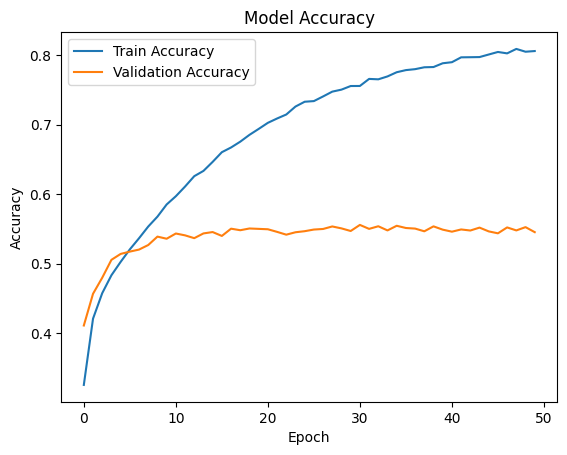

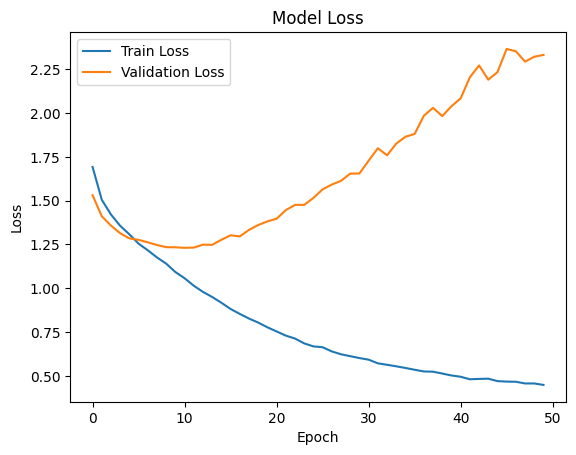

 Test Accuracy: 54.53%
 Test Loss: 2.3322


In [ ]:
!pip install tensorflow keras pandas matplotlib scikit-learn --quiet

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# !unzip -o fer2013.csv.zip # This is not needed as the file is downloaded by kagglehub

data = pd.read_csv(fer_path) # Use the path from kagglehub
print(" Dataset loaded:", data.shape)
print(data.head())


pixels = data['pixels'].tolist()
X = np.array([np.fromstring(p, dtype=int, sep=' ').reshape(48,48,1) for p in pixels])
y = to_categorical(data['emotion'].values)

X = X / 255.0  # normalize


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ========================
# 6. Train Model
# ========================
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=64,
    verbose=1
)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f" Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

In [1]:
# Add these imports if missing
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your prepared data
imgs = np.load('/kaggle/working/images.npy')
labels = np.load('/kaggle/working/labels.npy')

# Split data properly
X_train, X_test, y_train, y_test = train_test_split(
    imgs, labels, test_size=0.2, random_state=42, stratify=labels
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

# Build the model
def create_emotion_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(7, activation='softmax')  # 7 emotions
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create and train model
model = create_emotion_model()
model.summary()

# Train with proper history capture
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_val, y_val),
    verbose=1
)

# CORRECTED PLOTTING CODE
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy - CORRECTED
    ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    # Plot loss - CORRECTED
    ax2.plot(history.history['loss'], label='Training Loss', color='blue')
    ax2.plot(history.history['val_loss'], label='Validation Loss', color='red')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the corrected graphs
plot_training_history(history)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

NameError: name 'np' is not defined

Loading FER2013 dataset...
Converting pixels to images...
Images shape: (35887, 48, 48, 1)
Labels shape: (35887,)
Splitting data into train/validation/test sets...
Training set: (22967, 48, 48, 1)
Validation set: (5742, 48, 48, 1)
Test set: (7178, 48, 48, 1)
Creating model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,274,887 (4.86 MB)

 Trainable params: 1,274,887 (4.86 MB)

 Non-trainable params: 0 (0.00 B)


Starting training...
Epoch 1/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 92s 245ms/step - accuracy: 0.2404 - loss: 1.8306 - val_accuracy: 0.3079 - val_loss: 1.6869
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 138s 234ms/step - accuracy: 0.3433 - loss: 1.6469 - val_accuracy: 0.4281 - val_loss: 1.4678
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 234ms/step - accuracy: 0.4410 - loss: 1.4509 - val_accuracy: 0.4720 - val_loss: 1.3635
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 148s 250ms/step - accuracy: 0.4805 - loss: 1.3480 - val_accuracy: 0.4943 - val_loss: 1.3028
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 137s 236ms/step - accuracy: 0.5249 - loss: 1.2496 - val_accuracy: 0.5155 - val_loss: 1.2457
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 237ms/step - accuracy: 0.5487 - loss: 1.1994 - val_accuracy: 0.5193 - val_loss: 1.2364
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 142s 238ms/step - accuracy: 0.5700 - loss: 1.1370 - val_accuracy: 0.5340 - val_loss: 1.2164
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 143s 239ms/step

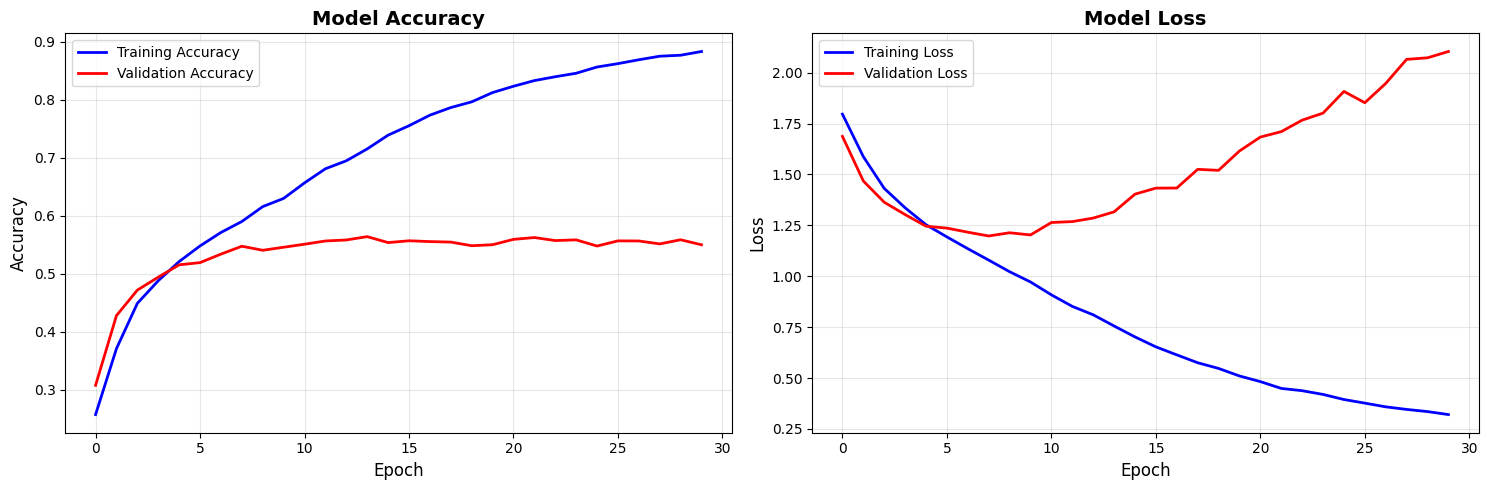


Evaluating model on test set...


📊 Final Test Accuracy: 0.5612
📊 Final Test Loss: 1.9871
💾 Model saved as 'emotion_model.h5'

✅ Training completed successfully!


In [15]:
# COMPLETE CODE - FROM DATA LOADING TO TRAINING
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load and prepare FER2013 data
print("Loading FER2013 dataset...")
fer_path = '/root/.cache/kagglehub/datasets/yusufkorayhasdemir/fer2013csv/versions/1/fer2013.csv'
df = pd.read_csv(fer_path)

def pixels_to_img(pixels_str):
    arr = np.fromstring(pixels_str, dtype=int, sep=' ')
    return arr.reshape(48, 48).astype('uint8')

# Convert pixels to images
print("Converting pixels to images...")
imgs = np.stack(df['pixels'].apply(lambda s: pixels_to_img(s)).values)
imgs = imgs[..., np.newaxis] / 255.0  # Normalize to [0,1]
labels = df['emotion'].values

print(f"Images shape: {imgs.shape}")
print(f"Labels shape: {labels.shape}")

# Split data properly
print("Splitting data into train/validation/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    imgs, labels, test_size=0.2, random_state=42, stratify=labels
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Build the model
def create_emotion_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
        MaxPooling2D(2, 2),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(7, activation='softmax')  # 7 emotions
    ])

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create and train model
print("Creating model...")
model = create_emotion_model()
model.summary()

# Train with proper history capture
print("\nStarting training...")
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_val, y_val),
    verbose=1
)

# CORRECTED PLOTTING CODE - This fixes the reversed graphs issue
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy - CORRECTED VERSION
    ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
    ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Plot loss - CORRECTED VERSION
    ax2.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
    ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot the corrected graphs
print("\nPlotting training history...")
plot_training_history(history)

# Evaluate the model
print("\nEvaluating model on test set...")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"📊 Final Test Accuracy: {test_accuracy:.4f}")
print(f"📊 Final Test Loss: {test_loss:.4f}")

# Save the model
model.save('/kaggle/working/emotion_model.h5')
print("💾 Model saved as 'emotion_model.h5'")

print("\n✅ Training completed successfully!")

Setting up file paths...
Loading FER2013 dataset...
Converting pixels to images...
Images shape: (35887, 48, 48, 1)
Labels shape: (35887,)

Class distribution in original data:
Emotion 0: 4953 samples
Emotion 1: 547 samples
Emotion 2: 5121 samples
Emotion 3: 8989 samples
Emotion 4: 6077 samples
Emotion 5: 4002 samples
Emotion 6: 6198 samples
Splitting data into train/validation/test sets...
Training set: (22967, 48, 48, 1)
Validation set: (5742, 48, 48, 1)
Test set: (7178, 48, 48, 1)
Setting up data augmentation...
Creating improved model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 44, 44, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 44, 44, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 18, 18, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 5, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 5, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 454,887 (1.74 MB)

 Trainable params: 453,223 (1.73 MB)

 Non-trainable params: 1,664 (6.50 KB)

Setting up callbacks...

Starting training with improvements...
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


358/358 ━━━━━━━━━━━━━━━━━━━━ 284s 762ms/step - accuracy: 0.1840 - loss: 3.4391 - val_accuracy: 0.2504 - val_loss: 2.7072 - learning_rate: 0.0010
Epoch 2/20
  1/358 ━━━━━━━━━━━━━━━━━━━━ 3:56 664ms/step - accuracy: 0.2344 - loss: 2.7761

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.2344 - loss: 2.7761 - val_accuracy: 0.2504 - val_loss: 2.7056 - learning_rate: 0.0010
Epoch 3/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 289s 730ms/step - accuracy: 0.2472 - loss: 2.7104 - val_accuracy: 0.3022 - val_loss: 2.4360 - learning_rate: 0.0010
Epoch 4/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.3906 - loss: 2.3859 - val_accuracy: 0.3006 - val_loss: 2.4422 - learning_rate: 0.0010
Epoch 5/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 265s 740ms/step - accuracy: 0.3163 - loss: 2.4280 - val_accuracy: 0.3936 - val_loss: 2.1588 - learning_rate: 0.0010
Epoch 6/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.3125 - loss: 2.1740 - val_accuracy: 0.3950 - val_loss: 2.1565 - learning_rate: 0.0010
Epoch 7/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 265s 740ms/step - accuracy: 0.3645 - loss: 2.2033 - val_accuracy: 0.4107 - val_loss: 2.0342 - learning_rate: 0.0010
Epoch 8/20
358/358 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.4062 - loss: 

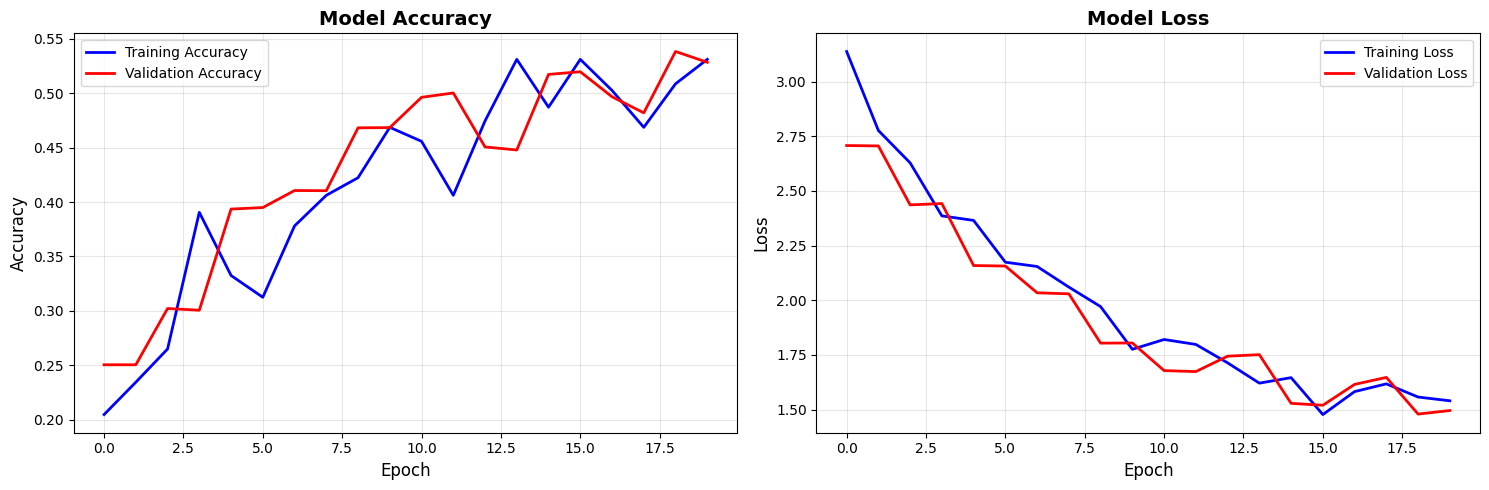


Evaluating model on test set...


📊 Final Test Accuracy: 0.5483
📊 Final Test Loss: 1.4509

📈 Training completed at epoch 20
🏁 Final Training Accuracy: 0.5312
🏁 Final Validation Accuracy: 0.5286
🏁 Final Training Loss: 1.5406
🏁 Final Validation Loss: 1.4961
💾 Improved model saved as 'improved_emotion_model.h5'

✅ Training completed successfully with overfitting fixes!


In [4]:
# COMPLETE CODE WITH CORRECT FILE PATHS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

# Use the correct file paths from your original notebook
print("Setting up file paths...")
fer_path = '/root/.cache/kagglehub/datasets/yusufkorayhasdemir/fer2013csv/versions/1/fer2013.csv'

# Check if file exists, if not use the preprocessed data
if not os.path.exists(fer_path):
    print("FER2013 CSV not found at expected path. Checking for preprocessed data...")

    # Try to load preprocessed data
    try:
        imgs = np.load('/kaggle/working/images.npy')
        labels = np.load('/kaggle/working/labels.npy')
        print("✅ Loaded preprocessed data from images.npy and labels.npy")
    except:
        print("❌ No preprocessed data found. Please run the data preparation cells first.")
        # Let's recreate the data preparation
        print("Recreating data preparation...")
        import kagglehub

        # Download dataset
        print("Downloading FER2013 dataset...")
        yusufkorayhasdemir_fer2013csv_path = kagglehub.dataset_download('yusufkorayhasdemir/fer2013csv')
        fer_path = yusufkorayhasdemir_fer2013csv_path + '/fer2013.csv'
        print(f"Dataset downloaded to: {fer_path}")

# Load FER2013 data
print("Loading FER2013 dataset...")
df = pd.read_csv(fer_path)

def pixels_to_img(pixels_str):
    arr = np.fromstring(pixels_str, dtype=int, sep=' ')
    return arr.reshape(48, 48).astype('uint8')

# Convert pixels to images
print("Converting pixels to images...")
imgs = np.stack(df['pixels'].apply(lambda s: pixels_to_img(s)).values)
imgs = imgs[..., np.newaxis] / 255.0  # Normalize to [0,1]
labels = df['emotion'].values

print(f"Images shape: {imgs.shape}")
print(f"Labels shape: {labels.shape}")

# Check class distribution
print("\nClass distribution in original data:")
unique, counts = np.unique(labels, return_counts=True)
for emotion, count in zip(unique, counts):
    print(f"Emotion {emotion}: {count} samples")

# Split data properly
print("Splitting data into train/validation/test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    imgs, labels, test_size=0.2, random_state=42, stratify=labels
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# Data Augmentation to prevent overfitting
print("Setting up data augmentation...")
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# IMPROVED MODEL ARCHITECTURE
def create_improved_emotion_model():
    model = Sequential([
        # First Conv Block
        Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1),
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        # Second Conv Block
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        # Third Conv Block
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        # Dense Layers
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(7, activation='softmax')  # 7 emotions
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create improved model
print("Creating improved model...")
model = create_improved_emotion_model()
model.summary()

# Callbacks to prevent overfitting and improve convergence
print("Setting up callbacks...")
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=0.00001,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

# Train with data augmentation and callbacks
print("\nStarting training with improvements...")
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    steps_per_epoch=len(X_train) // 64,
    epochs=20,  # More epochs with early stopping
    validation_data=(X_val, y_val),
    callbacks=[reduce_lr, early_stopping],
    verbose=1
)

# CORRECTED PLOTTING CODE
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
    ax1.set_title('Model Accuracy', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
    ax2.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
    ax2.set_title('Model Loss', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Loss', fontsize=12)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot the training history
print("\nPlotting training history...")
plot_training_history(history)

# Evaluate the model
print("\nEvaluating model on test set...")
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"📊 Final Test Accuracy: {test_accuracy:.4f}")
print(f"📊 Final Test Loss: {test_loss:.4f}")

# Show final epoch results
final_epoch = len(history.history['accuracy'])
print(f"\n📈 Training completed at epoch {final_epoch}")
print(f"🏁 Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"🏁 Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"🏁 Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"🏁 Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Save the model
model.save('/kaggle/working/improved_emotion_model.h5')
print("💾 Improved model saved as 'improved_emotion_model.h5'")

print("\n✅ Training completed successfully with overfitting fixes!")